In [1]:
import pandas as pd
import os
!git clone https://github.com/Benjaxmen/pm-prediction
!cd pm-prediction/

Cloning into 'pm-prediction'...
remote: Enumerating objects: 419, done.
remote: Counting objects: 100% (29/29), done.
remote: Compressing objects: 100% (19/19), done.
remote: Total 419 (delta 12), reused 25 (delta 10), pack-reused 390
Receiving objects: 100% (419/419), 78.21 MiB | 12.86 MiB/s, done.
Resolving deltas: 100% (20/20), done.
Updating files: 100% (345/345), done.


In [2]:
df = pd.read_csv("/content/pm-prediction/consolidado.csv")
df.describe()

,mp10,mp2.5,dirviento,tamb,so2,velviento,hrel,no2,o3,nox,no,co,region
count,134143.000000,100558.000000,118690.000000,110480.000000,95250.000000,118676.000000,106634.000000,93135.000000,115237.000000,92875.000000,95935.000000,112850.000000,151917.000000
mean,57.216134,24.908053,157.849877,11.559792,3.339253,1.306596,70.916567,15.419934,14.782911,39.125761,24.491000,0.805665,1.155802
std,34.948970,24.178638,87.973168,5.568606,5.548807,1.272454,21.698138,12.904806,9.782313,46.423891,43.381874,0.797392,0.659285
min,0.000000,0.000000,0.000000,-40.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,34.045750,12.000000,84.940325,8.752643,1.110000,0.459915,59.602500,6.220000,8.000000,11.833100,4.522970,0.315430,1.000000
50%,50.208300,19.000000,152.474000,11.716700,1.958330,0.883020,76.200000,12.041700,14.000000,22.291700,10.030000,0.550000,1.000000
75%,71.625000,30.750000,221.035000,14.709400,3.700000,1.686608,87.250000,21.070000,20.177100,45.003100,25.193600,1.018700,2.000000
max,917.940000,960.000000,360.000000,42.590000,406.845000,30.000000,105.000000,486.420000,500.496000,722.977000,2725.840000,22.210000,2.000000


In [3]:
df['FECHA (YYMMDD)']=pd.to_datetime(df['FECHA (YYMMDD)'],format='mixed')
df = df.sort_values(by='FECHA (YYMMDD)')
df['Date']=df['FECHA (YYMMDD)']
df.drop(columns='FECHA (YYMMDD)',inplace=True)

In [4]:
nan_count = df.isna().sum()
print(nan_count)


mp10         17774
station          0
mp2.5        51359
dirviento    33227
tamb         41437
so2          56667
velviento    33241
hrel         45283
no2          58782
o3           36680
nox          59042
no           55982
co           39067
region           0
Date             0
dtype: int64


In [5]:
df.describe()

,mp10,mp2.5,dirviento,tamb,so2,velviento,hrel,no2,o3,nox,no,co,region,Date
count,134143.000000,100558.000000,118690.000000,110480.000000,95250.000000,118676.000000,106634.000000,93135.000000,115237.000000,92875.000000,95935.000000,112850.000000,151917.000000,151917
mean,57.216134,24.908053,157.849877,11.559792,3.339253,1.306596,70.916567,15.419934,14.782911,39.125761,24.491000,0.805665,1.155802,2014-02-09 15:20:56.825766400
min,0.000000,0.000000,0.000000,-40.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1997-04-02 00:00:00
25%,34.045750,12.000000,84.940325,8.752643,1.110000,0.459915,59.602500,6.220000,8.000000,11.833100,4.522970,0.315430,1.000000,2009-05-04 00:00:00
50%,50.208300,19.000000,152.474000,11.716700,1.958330,0.883020,76.200000,12.041700,14.000000,22.291700,10.030000,0.550000,1.000000,2015-02-22 00:00:00
75%,71.625000,30.750000,221.035000,14.709400,3.700000,1.686608,87.250000,21.070000,20.177100,45.003100,25.193600,1.018700,2.000000,2019-12-31 00:00:00
max,917.940000,960.000000,360.000000,42.590000,406.845000,30.000000,105.000000,486.420000,500.496000,722.977000,2725.840000,22.210000,2.000000,2024-04-22 00:00:00
std,34.948970,24.178638,87.973168,5.568606,5.548807,1.272454,21.698138,12.904806,9.782313,46.423891,43.381874,0.797392,0.659285,NaN


In [6]:
print(df.groupby('region').count())

         mp10  station  mp2.5  dirviento   tamb    so2  velviento   hrel  \
region                                                                     
0       12322    23025  10290      20299  16401  13727      20250  13582   
1       80395    82198  62300      61566  62301  48386      61536  60744   
2       41426    46694  27968      36825  31778  33137      36890  32308   

          no2     o3    nox     no     co   Date  
region                                            
0       10411   6266   9406   9437   7658  23025  
1       51786  77009  54384  53403  77427  82198  
2       30938  31962  29085  33095  27765  46694  


* Region 0: Antofagasta
* Region 1: Metropolitana
* Region 2: Bio Bio


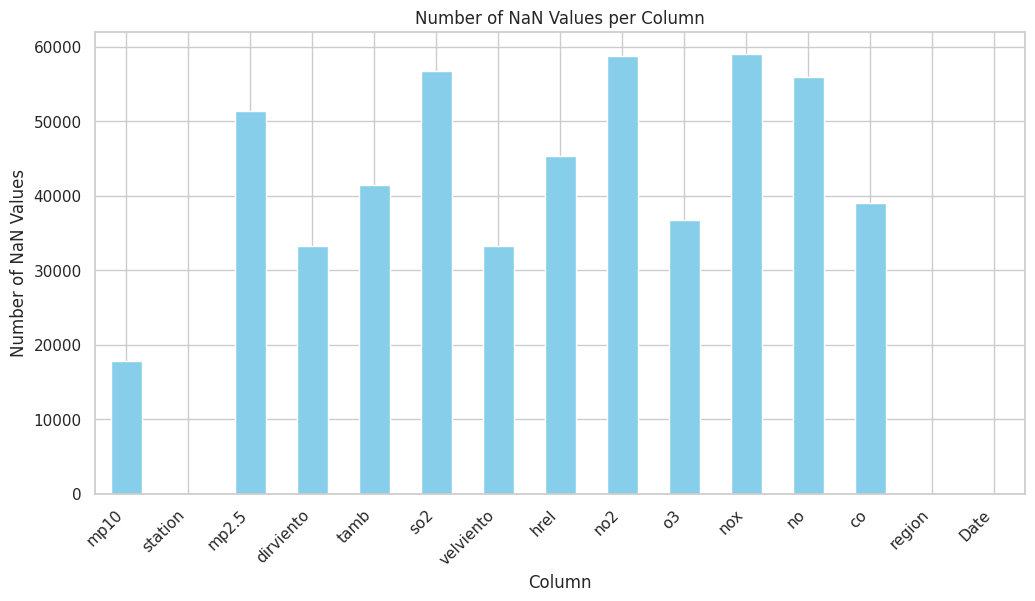

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the count of NaN for each column
nan_count = df.isna().sum()

# Set seaborn style (optional)
sns.set(style="whitegrid")

# Create a bar plot
plt.figure(figsize=(12, 6))
nan_count.plot(kind='bar', color='skyblue')
plt.title('Number of NaN Values per Column')
plt.xlabel('Column')
plt.ylabel('Number of NaN Values')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability

# Show the plot
plt.show()


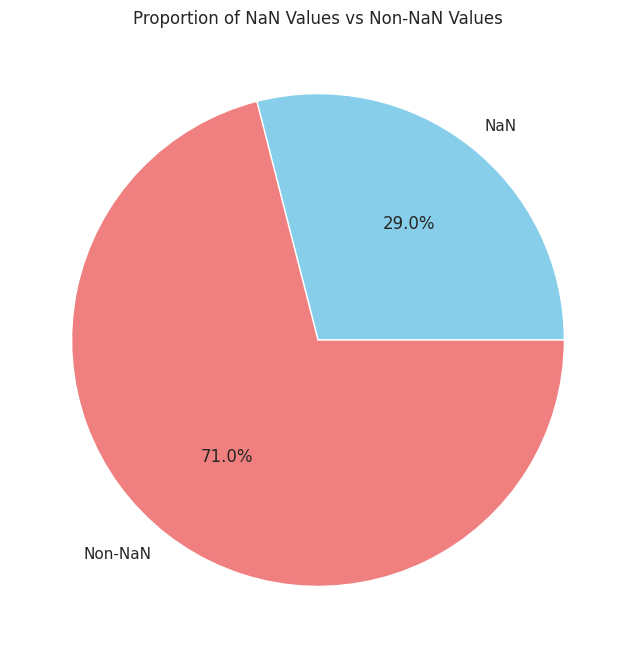

In [8]:
# Calcular la cantidad de NaN y no NaN por cada columna
nan_count = df.isna().sum()
non_nan_count = df.count(numeric_only=True)

# Calcular la proporción de NaN versus no NaN
nan_proportion = nan_count / (nan_count + non_nan_count)

# Configurar el gráfico de pastel
plt.figure(figsize=(8, 8))
plt.pie([nan_proportion.sum()/12, 1 - nan_proportion.sum()/12], labels=['NaN', 'Non-NaN'], autopct='%1.1f%%', colors=['skyblue', 'lightcoral'])
plt.title('Proportion of NaN Values vs Non-NaN Values')

# Mostrar el gráfico
plt.show()


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 151917 entries, 57207 to 99929
Data columns (total 15 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   mp10       134143 non-null  float64       
 1   station    151917 non-null  object        
 2   mp2.5      100558 non-null  float64       
 3   dirviento  118690 non-null  float64       
 4   tamb       110480 non-null  float64       
 5   so2        95250 non-null   float64       
 6   velviento  118676 non-null  float64       
 7   hrel       106634 non-null  float64       
 8   no2        93135 non-null   float64       
 9   o3         115237 non-null  float64       
 10  nox        92875 non-null   float64       
 11  no         95935 non-null   float64       
 12  co         112850 non-null  float64       
 13  region     151917 non-null  int64         
 14  Date       151917 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(12), int64(1), object(1)
memory usage: 1

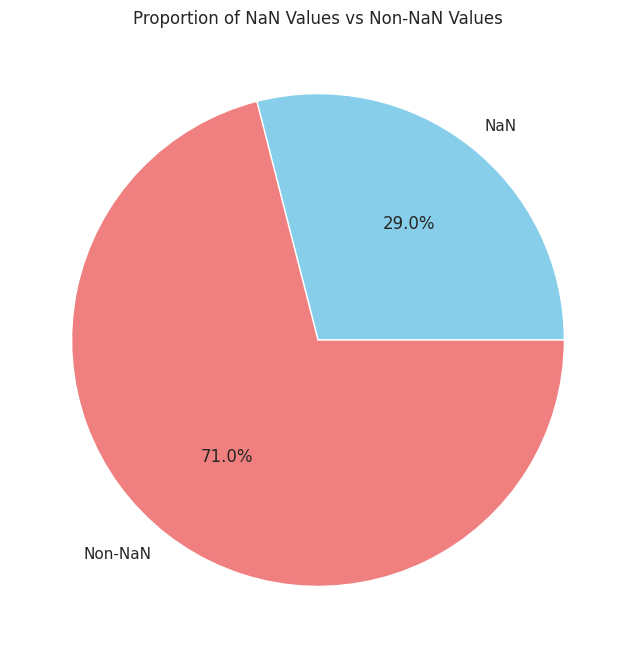

In [10]:
# Calcular la cantidad de NaN y no NaN por cada columna
nan_count = df.isna().sum()
non_nan_count = df.count(numeric_only=True)

# Calcular la proporción de NaN versus no NaN
nan_proportion = nan_count / (nan_count + non_nan_count)

# Configurar el gráfico de pastel
plt.figure(figsize=(8, 8))
plt.pie([nan_proportion.sum()/12, 1 - nan_proportion.sum()/12], labels=['NaN', 'Non-NaN'], autopct='%1.1f%%', colors=['skyblue', 'lightcoral'])
plt.title('Proportion of NaN Values vs Non-NaN Values')

# Mostrar el gráfico
plt.show()

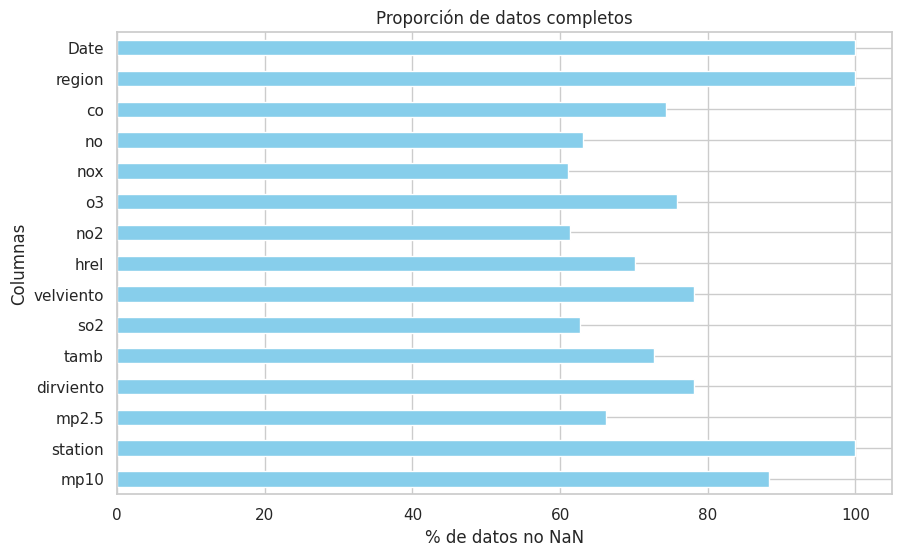

In [11]:
# Calcula el porcentaje de valores no NaN en cada columna
non_nan_percentages = df.count() / len(df) * 100

# Crea el gráfico de barras horizontal
plt.figure(figsize=(10, 6))
non_nan_percentages.plot(kind='barh', color='skyblue')
plt.xlabel('% de datos no NaN')
plt.ylabel('Columnas')
plt.title('Proporción de datos completos')
plt.show()


In [12]:
df.head()

,mp10,station,mp2.5,dirviento,tamb,so2,velviento,hrel,no2,o3,nox,no,co,region,Date
57207,111.048,independencia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.4583,NaN,NaN,NaN,1,1997-04-02
75163,111.565,parque ohiggins,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.8750,NaN,NaN,NaN,1,1997-04-02
47710,NaN,las condes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24.8333,NaN,NaN,NaN,1,1997-04-02
40883,NaN,cerrillos 1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23.5000,NaN,NaN,NaN,1,1997-04-02
84629,NaN,El bosque,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16.9167,NaN,NaN,NaN,1,1997-04-02


In [13]:
# Function to interpolate within each group based on time
def interpolate_group(group):
    columns_to_interpolate = group.columns.difference(['station','tamb','region','Date'])
    group[columns_to_interpolate] = group[columns_to_interpolate].interpolate(method="linear", limit_direction="both")
    return group

# Apply interpolation within each group based on 'station'
df = df.groupby('station').apply(interpolate_group)

# Visualize the resulting DataFrame
print(df.head())

                    mp10    station    mp2.5  dirviento  tamb  so2  velviento  \
station                                                                         
El bosque 84629  178.542  El bosque  49.7829    221.195   NaN  9.5   0.950428   
          84630  178.542  El bosque  49.7829    221.195   NaN  9.5   0.950428   
          84631  178.542  El bosque  49.7829    221.195   NaN  9.5   0.950428   
          84632  178.542  El bosque  49.7829    221.195   NaN  9.5   0.950428   
          84633  146.042  El bosque  49.7829    221.195   NaN  9.5   0.950428   

                    hrel      no2       o3      nox       no        co  \
station                                                                  
El bosque 84629  40.5833  30.3333  16.9167  65.1666  34.8333  0.929165   
          84630  40.5833  30.3333  12.4583  65.1666  34.8333  0.929165   
          84631  40.5833  30.3333  23.2083  65.1666  34.8333  0.929165   
          84632  40.5833  30.3333  28.2917  65.1666  34.8333  

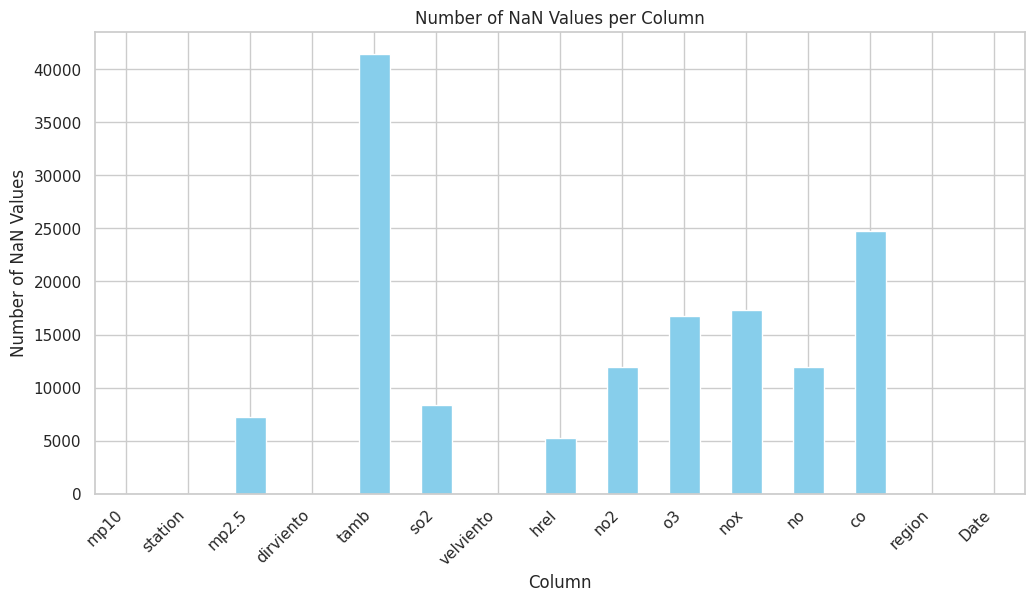

In [14]:
# Calculate the count of NaN for each column
nan_count = df.isna().sum()

# Set seaborn style (optional)
sns.set(style="whitegrid")

# Create a bar plot
plt.figure(figsize=(12, 6))
nan_count.plot(kind='bar', color='skyblue')
plt.title('Number of NaN Values per Column')
plt.xlabel('Column')
plt.ylabel('Number of NaN Values')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability

# Show the plot
plt.show()

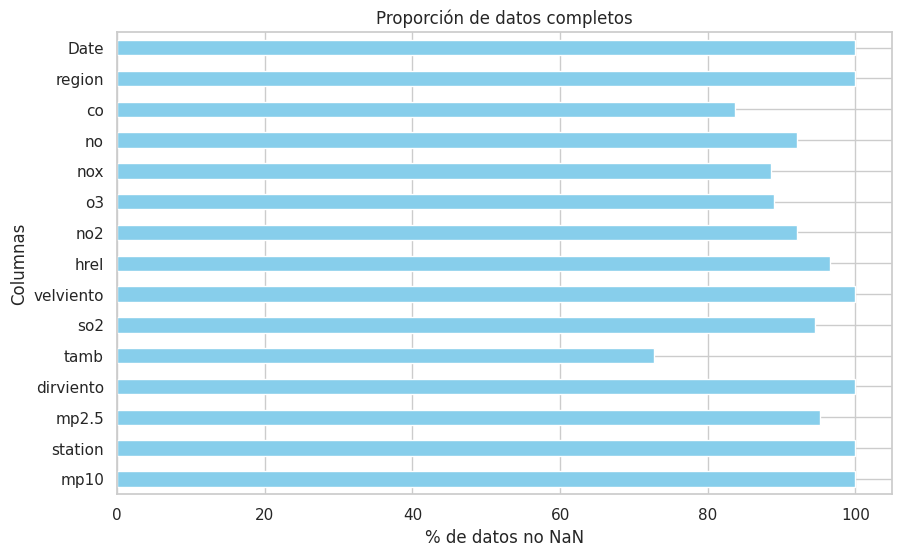

In [15]:
# Calcula el porcentaje de valores no NaN en cada columna
non_nan_percentages = df.count() / len(df) * 100

# Crea el gráfico de barras horizontal
plt.figure(figsize=(10, 6))
non_nan_percentages.plot(kind='barh', color='skyblue')
plt.xlabel('% de datos no NaN')
plt.ylabel('Columnas')
plt.title('Proporción de datos completos')
plt.show()


In [16]:
# Crear nuevas columnas para año, mes y día
df['Year'] = (df['Date'].dt.year)
df['Month'] = (df['Date'].dt.month)
df['Day'] = (df['Date'].dt.day)

In [17]:
df['station'] = df['station'].str.replace(' ', '_')
df['station'].unique()

array(['El_bosque', 'cerrillos_1', 'cerro_navia', 'club_23_de_marz',
       'club_de_empleados', 'colicheu', 'consultorio_san_vicente',
       'coronel_norte', 'coronel_sur', 'escuadron_enel',
       'estacion_centro', 'hospital_del_cobre', 'hualqui',
       'independencia', 'kingston_college', 'la_florida',
       'lagunillas_enel', 'laja', 'las_condes', 'lautaro',
       'liceo_polivalente', 'lota_rural', 'lota_urbana', 'nueva_libertad',
       'parque_ohiggins', 'pudahuel', 'puente_alto',
       'supersite-escuela_e10', 'talagante'], dtype=object)

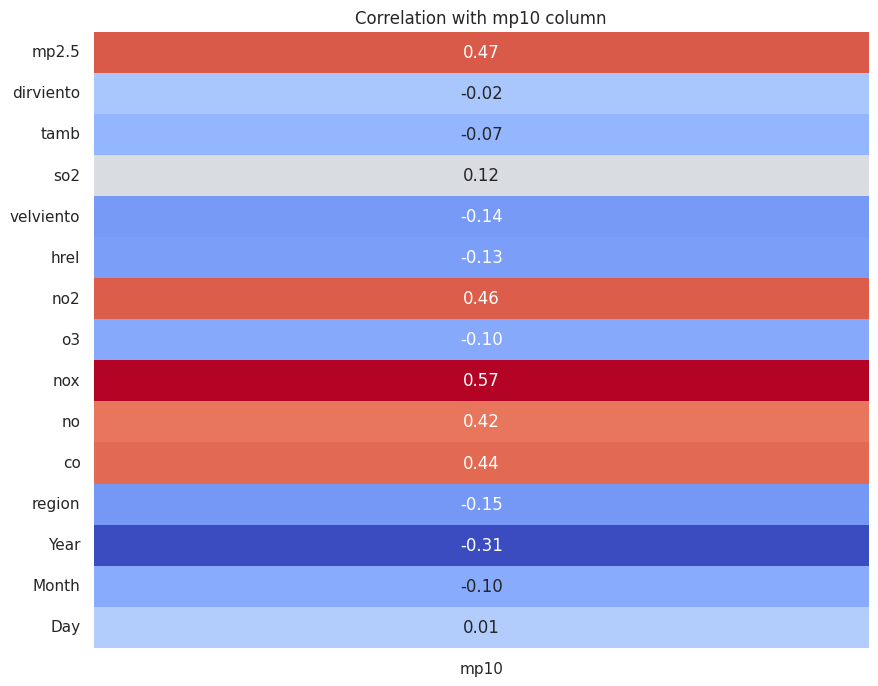

In [18]:
# Calculate correlation only for 'mp10' column with other numeric columns
corr_mp10 = df.select_dtypes(include='number').corr()['mp10'].drop('mp10')

plt.figure(figsize=(10, 8))
sns.heatmap(corr_mp10.to_frame(), annot=True, cmap='coolwarm', fmt=".2f", cbar=False)
plt.title('Correlation with mp10 column')
plt.show()

In [19]:
df.groupby('Year').count()

,mp10,station,mp2.5,dirviento,tamb,so2,velviento,hrel,no2,o3,nox,no,co,region,Date,Month,Day
Year,,,,,,,,,,,,,,,,,
1997,1884,1884,1884,1884,0,1884,1884,1884,1884,1884,1884,1884,1884,1884,1884,1884,1884
1998,2521,2521,2521,2521,0,2521,2521,2521,2521,2521,2521,2521,2521,2521,2521,2521,2521
1999,2530,2530,2530,2530,0,2530,2530,2530,2530,2530,2530,2530,2530,2530,2530,2530,2530
2001,3099,3099,3099,3099,0,2826,3099,3099,3099,3099,3099,3099,3099,3099,3099,3099,3099
2002,3545,3545,3545,3545,0,3197,3545,3545,3217,3217,3217,3217,3217,3545,3545,3545,3545
2003,3606,3606,3606,3606,134,3248,3606,3606,3241,3241,3241,3241,3241,3606,3606,3606,3606
2004,3650,3650,3650,3650,2731,3284,3650,3650,3284,3284,3284,3284,3284,3650,3650,3650,3650
2005,3647,3647,3647,3647,3284,3282,3647,3647,3282,3282,3282,3282,3282,3647,3647,3647,3647
2006,3689,3689,3649,3689,3181,3324,3689,3689,3324,3324,3324,3324,3324,3689,3689,3689,3689


<Axes: >

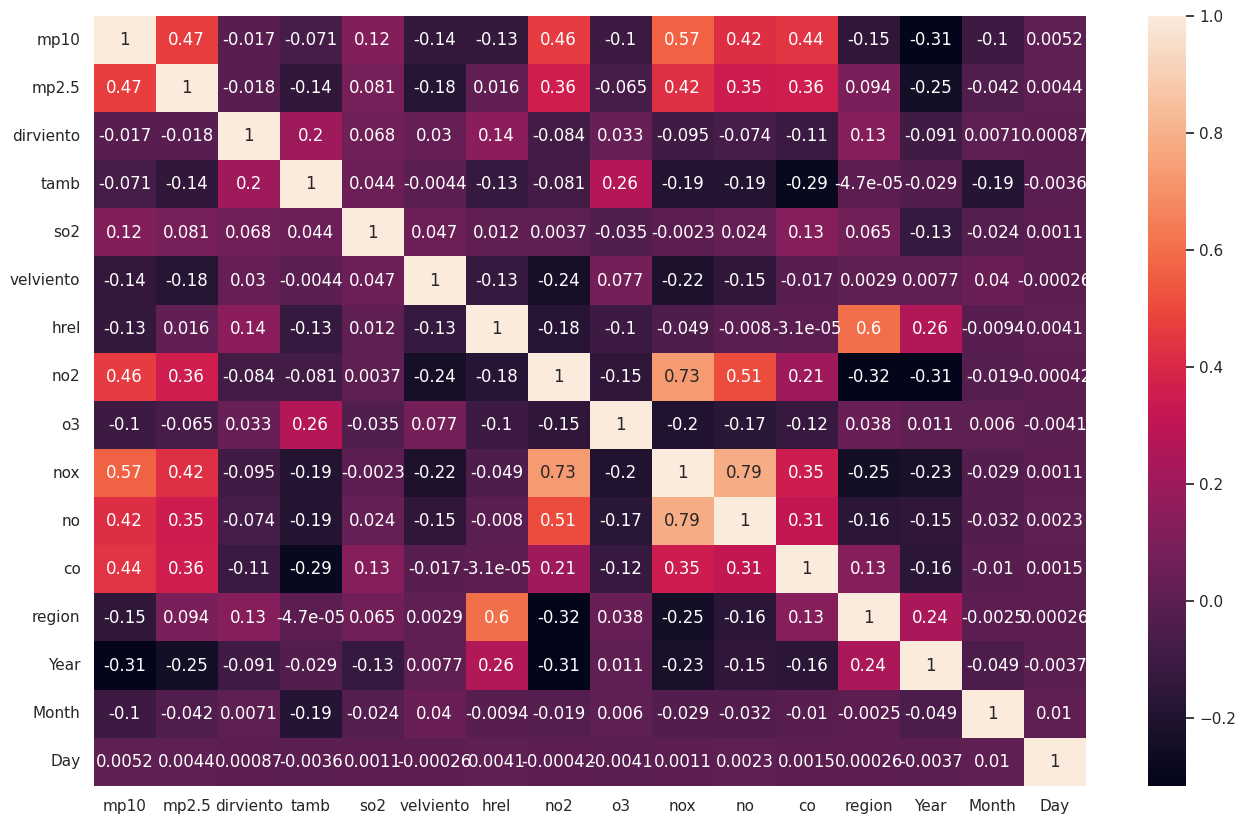

In [20]:
# Selecciona las columnas numéricas del DataFrame
numeric_columns = df.select_dtypes(include='number').columns

# Crea un mapa de correlación
corr = df[numeric_columns].corr()
plt.figure(figsize=(16, 10))

# Visualiza el mapa de correlación
sns.heatmap(corr, annot=True)

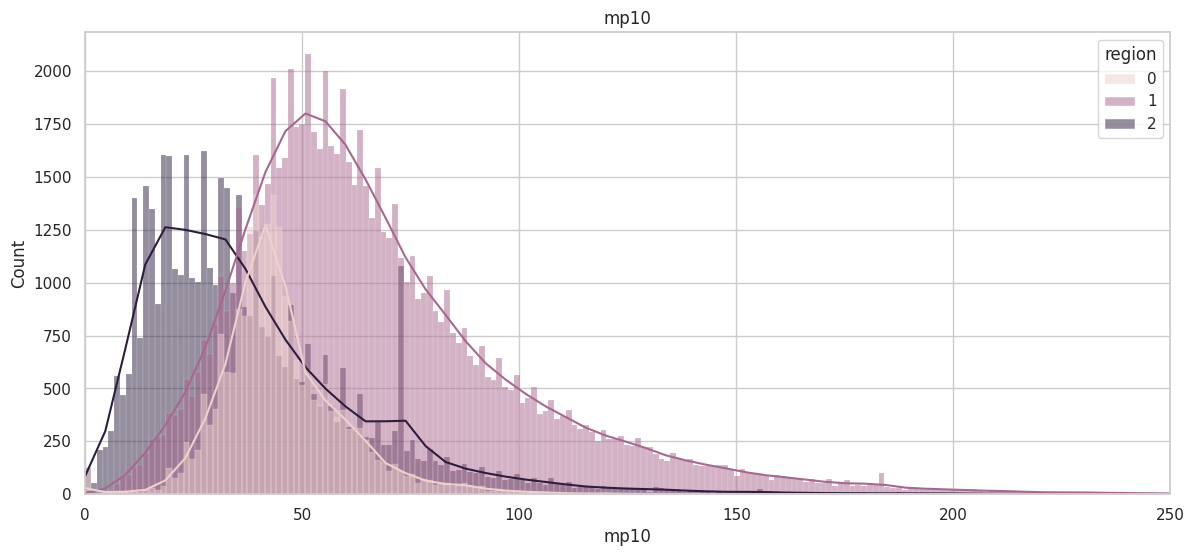

In [21]:
plt.figure(figsize=(14,6))
sns.histplot(data=df,x='mp10',kde=True,hue='region')
plt.xlim(0,250)
plt.title("mp10")
plt.show()

In [22]:
!pip install utm


  Preparing metadata (setup.py) ... done
  Created wheel for utm: filename=utm-0.7.0-py3-none-any.whl size=6084 sha256=73ddd2f771ec2ca132847fcb6a5e6a72f2d508d786c77639cdd291a14aa4118a
  Stored in directory: /root/.cache/pip/wheels/2f/a1/c8/543df0e8f5e824c3e92a432e32deb9cd89ae686095ee8cfcbe
Successfully built utm


In [23]:
#utm coordinates by station
independencia=[346488,6300681,19]
parque_ohiggins=[345673,6296019,19]
las_condes=[358305,6305906,19]
cerrillos_1=[340277,6292747,19]
El_bosque=[345313,6286825,19]
pudahuel=[337311,6298809,19]
la_florida=[352504,6290304,19]
supersite_escuela_e10=[377404,7557193,19]
cerro_navia=[338984,6299360,19]
hospital_del_cobre=[509242,7516916,19]
coronel_sur=[665556 ,5899980,18]
puente_alto=[352049,6282013,19]
talagante=[318945,6272298,19]
liceo_polivalente=[682597,5947369,18]
kingston_college=[673817,5927247,18]
consultorio_san_vicente=[667557,5934138,18]
nueva_libertad=[667962,5932742,19]
lota_urbana=[664885,5895289,18]
lota_rural=[664203,5892415,18]
colicheu=[743195,5899021,18]
club_23_de_marzo=[506399 ,7516241 ,19]
estacion_centro=[507389,7516053,19]
hualqui=[684073 ,5905626,18]
club_de_empleados=[705393,5846899,19]
lautaro=[707166,5846063,18]
laja=[702974,5872964,19]
coronel_norte=[664628,5902487,19]
lagunillas_enel=[664362,5905258,18]
escuadron_enel=[664643,5908666,18]
stations=[independencia,parque_ohiggins,las_condes,cerrillos_1,El_bosque,pudahuel,la_florida,supersite_escuela_e10,cerro_navia,hospital_del_cobre,coronel_sur,puente_alto,talagante,liceo_polivalente,kingston_college,consultorio_san_vicente,nueva_libertad,lota_urbana,lota_rural,colicheu,club_23_de_marzo,estacion_centro,hualqui,club_de_empleados,lautaro,laja,coronel_norte,lagunillas_enel,escuadron_enel]

In [24]:
import utm
def utm_to_latlon(easting, northing, zone_number):
    # Convert UTM to latitude and longitude
    lat, lon = utm.to_latlon(easting, northing, zone_number,northern=False)
    return lat, lon

places = ['independencia', 'parque_ohiggins', 'las_condes', 'cerrillos_1', 'El_bosque', 'pudahuel', 'la_florida', 'supersite_escuela_e10', 'cerro_navia', 'hospital_del_cobre', 'coronel_sur', 'puente_alto', 'talagante', 'liceo_polivalente', 'kingston_college', 'consultorio_san_vicente', 'nueva_libertad', 'lota_urbana', 'lota_rural', 'colicheu', 'club_23_de_marzo', 'estacion_centro', 'hualqui', 'club_de_empleados', 'lautaro', 'laja', 'coronel_norte', 'lagunillas_enel', 'escuadron_enel']
station_dict={}
for station in stations:
  pointer=utm_to_latlon(station[0], station[1], station[2])
  station=[pointer[0],pointer[1]]
  station_dict[places.pop(0)]=station


In [25]:
station_dict

{'independencia': [-33.42226118896334, -70.65113863331389],
 'parque_ohiggins': [-33.46417650404609, -70.66070229347744],
 'las_condes': [-33.376776047290946, -70.5232561485476],
 'cerrillos_1': [-33.492884232397124, -70.71932866072721],
 'El_bosque': [-33.54701601793992, -70.66616286081593],
 'pudahuel': [-33.43778535588638, -70.75014408801236],
 'la_florida': [-33.516666882320685, -70.58816010361122],
 'supersite_escuela_e10': [-22.08584570564769, -70.1883608994189],
 'cerro_navia': [-33.43307040157682, -70.73205509371141],
 'hospital_del_cobre': [-22.45401303052513, -68.91017511944003],
 'coronel_sur': [-37.03180018388554, -73.13863514642104],
 'puente_alto': [-33.591356239496974, -70.5944306781794],
 'talagante': [-33.67381931104121, -70.95299615854955],
 'liceo_polivalente': [-36.601716045579685, -72.95852150074575],
 'kingston_college': [-36.784649744533155, -73.05206181268939],
 'consultorio_san_vicente': [-36.72369016050932, -73.12369491449813],
 'nueva_libertad': [-36.73619651

In [26]:
df['lat'] = df['station'].map(lambda x: station_dict.get(x, [None, None])[0])
df['long'] = df['station'].map(lambda x: station_dict.get(x, [None, None])[1])

In [27]:
df.head()

mp10    station    mp2.5  dirviento  tamb  so2  velviento  \
station                                                                         
El bosque 84629  178.542  El_bosque  49.7829    221.195   NaN  9.5   0.950428   
          84630  178.542  El_bosque  49.7829    221.195   NaN  9.5   0.950428   
          84631  178.542  El_bosque  49.7829    221.195   NaN  9.5   0.950428   
          84632  178.542  El_bosque  49.7829    221.195   NaN  9.5   0.950428   
          84633  146.042  El_bosque  49.7829    221.195   NaN  9.5   0.950428   

                    hrel      no2       o3      nox       no        co  \
station                                                                  
El bosque 84629  40.5833  30.3333  16.9167  65.1666  34.8333  0.929165   
          84630  40.5833  30.3333  12.4583  65.1666  34.8333  0.929165   
          84631  40.5833  30.3333  23.2083  65.1666  34.8333  0.929165   
          84632  40.5833  30.3333  28.2917  65.1666  34.8333  0.929165   
          84633  40.5833  30.3333  21.2083  65.1666  34.8333  1.204160   

                 region       Date  Year  Month  Day        lat       long  
station                                                                     
El bosque 84629       1 1997-04-02  1997      4    2 -33.547016 -70.666163  
          84630       1 1997-04-03  1997      4    3 -33.547016 -70.666163  
          84631       1 1997-04-04  1997      4    4 -33.547016 -70.666163  
          84632       1 1997-04-05  1997      4    5 -33.547016 -70.666163  
          84633       1 1997-04-06  1997      4    6 -33.547016 -70.666163

In [38]:
df.to_csv('processed_data.csv')